# Chapter 6 - Latent Mixture Models

In [1]:
import pyjags
#import assistant classes from parent directory
#jupyter needs a standard way to do relative imports.
import os
nb_path = os.getcwd()
parent_path = os.path.split(nb_path)[0]
os.chdir(parent_path)
from pjbcmassistant import model_handler
from pjbcmassistant import sample_handler
os.chdir(nb_path)

## 6.1 - Exam Scores

In [2]:
spec = """
model:
Exams_1J.txt

settings:
chains = 3
samples = 1000
thinning = 0
burnin = 1000

data:
k = [21, 17, 21, 18, 22, 31, 31, 34, 34, 35, 35, 36, 39, 36, 35] #Number correct for each person

n = 40
#psi = 0.5 #assigned in the model

p = len(k)

sample:
phi
z

"""

modelbuddy = model_handler(spec)

model = pyjags.Model(**modelbuddy.get_model_args())
samples = model.sample(**modelbuddy.get_sample_args())

samplebuddy = sample_handler(samples)

adapting: iterations 3000 of 3000, elapsed 0:00:00, remaining 0:00:00
sampling: iterations 3000 of 3000, elapsed 0:00:00, remaining 0:00:00


In [3]:
samplebuddy.summarize()

,mean,std dev,median,mode,HPD,95CI
phi,0.863200,0.017101,0.86385,0.861305,"[0.802, 0.901]","[0.829, 0.895]"
z_0,0.000000,0.000000,0.00000,0.005000,"[0.0, 0.001]","[0.0, 0.0]"
z_1,0.000000,0.000000,0.00000,0.005000,"[0.0, 0.001]","[0.0, 0.0]"
z_2,0.000000,0.000000,0.00000,0.005000,"[0.0, 0.001]","[0.0, 0.0]"
z_3,0.000000,0.000000,0.00000,0.005000,"[0.0, 0.001]","[0.0, 0.0]"
z_4,0.000000,0.000000,0.00000,0.005000,"[0.0, 0.001]","[0.0, 0.0]"
z_5,0.994000,0.077227,1.00000,0.995000,"[0.999, 1.0]","[1.0, 1.0]"
z_6,0.992667,0.085320,1.00000,0.995000,"[0.999, 1.0]","[1.0, 1.0]"
z_7,1.000000,0.000000,1.00000,1.005000,"[1.0, 1.001]","[1.0, 1.0]"
z_8,1.000000,0.000000,1.00000,1.005000,"[1.0, 1.001]","[1.0, 1.0]"


## 6.2 - Exam Scores With Individual Differences

In [4]:
spec = """
model:
Exams_2J.txt

settings:
chains = 3
samples = 1000
thinning = 0
burnin = 1000

data:
k = [21, 17, 21, 18, 22, 31, 31, 34, 34, 35, 35, 36, 39, 36, 35] #Number correct for each person

n = 40
#psi = 0.5 #assigned in the model

p = len(k)

sample:
predphi
theta
z
mu
sigma

"""

modelbuddy = model_handler(spec)

model = pyjags.Model(**modelbuddy.get_model_args())
samples = model.sample(**modelbuddy.get_sample_args())

samplebuddy = sample_handler(samples)

adapting: iterations 3000 of 3000, elapsed 0:00:00, remaining 0:00:00
sampling: iterations 3000 of 3000, elapsed 0:00:00, remaining 0:00:00


In [5]:
samplebuddy.summarize()

,mean,std dev,median,mode,HPD,95CI
mu,0.871984,0.038251,0.866812,0.872090,"[0.731, 0.997]","[0.81, 0.971]"
predphi,0.853800,0.074251,0.859324,0.876920,"[0.646, 0.998]","[0.695, 0.978]"
sigma,0.073531,0.124848,0.056725,0.046526,"[0.015, 0.175]","[0.024, 0.206]"
theta_0,0.501924,0.018337,0.500000,0.499240,"[0.5, 0.5]","[0.5, 0.5]"
theta_1,0.499805,0.006243,0.500000,0.500334,"[0.5, 0.5]","[0.5, 0.5]"
theta_2,0.501285,0.014925,0.500000,0.499958,"[0.5, 0.5]","[0.5, 0.5]"
theta_3,0.500155,0.005537,0.500000,0.501263,"[0.5, 0.5]","[0.5, 0.5]"
theta_4,0.503264,0.023917,0.500000,0.499696,"[0.5, 0.5]","[0.5, 0.51]"
theta_5,0.813937,0.049146,0.819886,0.830708,"[0.5, 0.901]","[0.709, 0.891]"
theta_6,0.815311,0.050471,0.821222,0.841865,"[0.5, 0.91]","[0.71, 0.893]"


## 6.3 - Twenty Questions

Note: the assistant module unpacks nested data in a different indexing order than the Trinity MATLAB script. While MATLAB reports k_question_person, this reports k_person_question.

Todo: determine why, and adjust assistant to use same unpacking rule as Trinity

Note 2: This script is again encountering trouble with NaN values.

Todo: debug NaN values in `pyjags`

In [6]:
import numpy as np

In [7]:
spec = """
model:
TwentyQuestions.txt

settings:
chains = 3
samples = 3000
thinning = 0
burnin = 1000

data:
#set below using setdata method

sample:
p
q
k

"""

modelbuddy = model_handler(spec)

k = [[1, 1, 1, 1, 0, 0, 1, 1, 0, 1, 0, 0, 1, 0, 0, 1, 0, 1, 0, 0], 
    [0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0], 
    [0, 0, 1, 0, 0, 0, 1, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0], 
    [0, 0, 0, 0, 0, 0, 1, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0], 
    [1, 0, 1, 1, 0, 1, 1, 1, 0, 1, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0], 
    [1, 1, 0, 1, 0, 0, 0, 1, 0, 1, 0, 1, 1, 0, 0, 1, 0, 1, 0, 0], 
    [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0], 
    [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0], 
    [0, 1, 1, 0, 0, 0, 0, 1, 0, 1, 0, 0, 1, 0, 0, 0, 0, 1, 0, 1], 
    [1, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0]]

k_nan = [[1.0, 1.0, 1.0, 1.0, 0.0, 0.0, 1.0, 1.0, 0.0, 1.0, 0.0, 0.0, np.nan, 0.0, 0.0, 1.0, 0.0, 1.0, 0.0, 0.0],
         [0.0, 1.0, 1.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0],
         [0.0, 0.0, 1.0, 0.0, 0.0, 0.0, 1.0, 1.0, 0.0, 0.0, 0.0, 0.0, 1.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0],
         [0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 1.0, 0.0, 1.0, 1.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0],
         [1.0, 0.0, 1.0, 1.0, 0.0, 1.0, 1.0, 1.0, 0.0, 1.0, 0.0, 0.0, 1.0, 0.0, 0.0, 0.0, 0.0, 1.0, 0.0, 0.0], 
         [1.0, 1.0, 0.0, 1.0, 0.0, 0.0, 0.0, 1.0, 0.0, 1.0, 0.0, 1.0, 1.0, 0.0, 0.0, 1.0, 0.0, 1.0, 0.0, 0.0], 
         [0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 1.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0], 
         [0.0, 0.0, 0.0, 0.0, np.nan, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0], 
         [0.0, 1.0, 1.0, 0.0, 0.0, 0.0, 0.0, 1.0, 0.0, 1.0, 0.0, 0.0, 1.0, 0.0, 0.0, 0.0, 0.0, 1.0, 0.0, 1.0],
         [1.0, 0.0, 0.0, 0.0, 0.0, 0.0, 1.0, 0.0, 0.0, 1.0, 0.0, 0.0, 1.0, 0.0, 0.0, 0.0, 0.0, np.nan, 0.0, 0.0]]

selected_data = k

modelbuddy.setdata('k', selected_data)
modelbuddy.setdata('np', np.shape(selected_data)[0])
modelbuddy.setdata('nq', np.shape(selected_data)[1])

model = pyjags.Model(**modelbuddy.get_model_args())
samples = model.sample(**modelbuddy.get_sample_args())

samplebuddy = sample_handler(samples)

adapting: iterations 3000 of 3000, elapsed 0:00:00, remaining 0:00:00
sampling: iterations 9000 of 9000, elapsed 0:00:01, remaining 0:00:00


In [8]:
samplebuddy.summarize()

,mean,std dev,median,mode,HPD,95CI
k_0_0,1.000000,0.000000,1.000000,1.005000,"[1.0, 1.001]","[1.0, 1.0]"
k_0_1,1.000000,0.000000,1.000000,1.005000,"[1.0, 1.001]","[1.0, 1.0]"
k_0_2,1.000000,0.000000,1.000000,1.005000,"[1.0, 1.001]","[1.0, 1.0]"
k_0_3,1.000000,0.000000,1.000000,1.005000,"[1.0, 1.001]","[1.0, 1.0]"
k_0_4,0.000000,0.000000,0.000000,0.005000,"[0.0, 0.001]","[0.0, 0.0]"
k_0_5,0.000000,0.000000,0.000000,0.005000,"[0.0, 0.001]","[0.0, 0.0]"
k_0_6,1.000000,0.000000,1.000000,1.005000,"[1.0, 1.001]","[1.0, 1.0]"
k_0_7,1.000000,0.000000,1.000000,1.005000,"[1.0, 1.001]","[1.0, 1.0]"
k_0_8,0.000000,0.000000,0.000000,0.005000,"[0.0, 0.001]","[0.0, 0.0]"
k_0_9,1.000000,0.000000,1.000000,1.005000,"[1.0, 1.001]","[1.0, 1.0]"


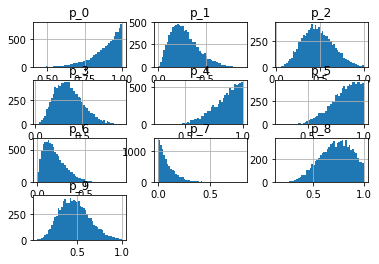

In [9]:
#consider baking this into the assistant module
samplebuddy.vizhist(*[f"p_{i}" for i in range(10)])

In [10]:
#Issue with values of K.
#perhaps our PSRF algorithm cannot handle
#strictly binary (or all 0?) data in an appropriate way
#Todo: revisit algorithm OR make exception for inappropriate data
samplebuddy.diagnostic()

/home/isaiah/projects/pyjagsBCMport/pjBCM/pjbcmassistant.py:398: RuntimeWarning: invalid value encountered in double_scalars
  rhat = np.sqrt(varhat/W)


Evidence of poor mixing.  Not all PSRF values not under 1.05 
 maximum PSRF: k_0_0 at nan.


## 6.4 - The Two-Country Quiz

We again encounter the issue with NaN values

In [11]:
spec = """
model:
TwoCountryQuiz.txt

settings:
chains = 3
samples = 3000
thinning = 0
burnin = 1000

data:
#all data calculated below.

sample:
x
z
alpha
beta

"""

modelbuddy = model_handler(spec)


k0= [[1.0, 0.0, 0.0, 1.0, 1.0, 0.0, 0.0, 1.0],
     [1.0, 0.0, 0.0, 1.0, 1.0, 0.0, 0.0, 1.0],
     [0.0, 1.0, 1.0, 0.0, 0.0, 1.0, 0.0, 0.0],
     [0.0, 1.0, 1.0, 0.0, 0.0, 1.0, 1.0, 0.0],
     [1.0, 0.0, 0.0, 1.0, 1.0, 0.0, 0.0, 1.0],
     [0.0, 0.0, 0.0, 1.0, 1.0, 0.0, 0.0, 1.0],
     [0.0, 1.0, 0.0, 0.0, 0.0, 1.0, 1.0, 0.0],
     [0.0, 1.0, 1.0, 1.0, 0.0, 1.0, 1.0, 0.0]]

k1 = [[1.0, 0.0, 0.0, 1.0, 1.0, 0.0, 0.0, 1.0],
      [1.0, 0.0, 0.0, 1.0, 1.0, 0.0, 0.0, 1.0],
      [0.0, 1.0, 1.0, 0.0, 0.0, 1.0, 0.0, 0.0],
      [0.0, 1.0, 1.0, 0.0, 0.0, 1.0, 1.0, 0.0],
      [1.0, 0.0, 0.0, 1.0, 1.0, 0.0, 0.0, 1.0],
      [0.0, 0.0, 0.0, 1.0, 1.0, 0.0, 0.0, 1.0],
      [0.0, 1.0, 0.0, 0.0, 0.0, 1.0, 1.0, 0.0],
      [0.0, 1.0, 1.0, 1.0, 0.0, 1.0, 1.0, 0.0],
      [1.0, 0.0, 0.0, 1.0, np.nan, np.nan, np.nan, np.nan],
      [0.0, np.nan, np.nan, np.nan, np.nan, np.nan, np.nan, np.nan],
      [np.nan, np.nan, np.nan, np.nan, np.nan, np.nan, np.nan, np.nan]]

k2 = [[1.0, 0.0, 0.0, 1.0, 1.0, 0.0, 0.0, 1.0],
      [1.0, 0.0, 0.0, 1.0, 1.0, 0.0, 0.0, 1.0],
      [1.0, 0.0, 0.0, 1.0, 1.0, 0.0, 0.0, 1.0],
      [1.0, 0.0, 0.0, 1.0, 1.0, 0.0, 0.0, 1.0],
      [1.0, 0.0, 0.0, 1.0, 1.0, 0.0, 0.0, 1.0],
      [1.0, 0.0, 0.0, 1.0, 1.0, 0.0, 0.0, 1.0],
      [1.0, 0.0, 0.0, 1.0, 1.0, 0.0, 0.0, 1.0],
      [1.0, 0.0, 0.0, 1.0, 1.0, 0.0, 0.0, 1.0],
      [1.0, 0.0, 0.0, 1.0, 1.0, 0.0, 0.0, 1.0],
      [1.0, 0.0, 0.0, 1.0, 1.0, 0.0, 0.0, 1.0],
      [1.0, 0.0, 0.0, 1.0, 1.0, 0.0, 0.0, 1.0],
      [1.0, 0.0, 0.0, 1.0, 1.0, 0.0, 0.0, 1.0],
      [0.0, 1.0, 1.0, 0.0, 0.0, 1.0, 0.0, 0.0],
      [0.0, 1.0, 1.0, 0.0, 0.0, 1.0, 1.0, 0.0],
      [1.0, 0.0, 0.0, 1.0, 1.0, 0.0, 0.0, 1.0],
      [0.0, 0.0, 0.0, 1.0, 1.0, 0.0, 0.0, 1.0],
      [0.0, 1.0, 0.0, 0.0, 0.0, 1.0, 1.0, 0.0],
      [0.0, 1.0, 1.0, 1.0, 0.0, 1.0, 1.0, 0.0],
      [1.0, 0.0, 0.0, 1.0, np.nan, np.nan, np.nan, np.nan],
      [0.0, np.nan, np.nan, np.nan, np.nan, np.nan, np.nan, np.nan],
      [np.nan, np.nan, np.nan, np.nan, np.nan, np.nan, np.nan, np.nan]]



selected_data = k0

modelbuddy.setdata('k', selected_data)

modelbuddy.setdata('nx', np.shape(selected_data)[0])
modelbuddy.setdata('nz', np.shape(selected_data)[1])

model = pyjags.Model(**modelbuddy.get_model_args())
samples = model.sample(**modelbuddy.get_sample_args())

samplebuddy = sample_handler(samples)

adapting: iterations 3000 of 3000, elapsed 0:00:00, remaining 0:00:00
sampling: iterations 9000 of 9000, elapsed 0:00:01, remaining 0:00:00


In [12]:
samplebuddy.summarize()

,mean,std dev,median,mode,HPD,95CI
alpha,0.878047,0.056775,0.885770,0.908773,"[0.717, 0.978]","[0.746, 0.964]"
beta,0.058034,0.038470,0.050497,0.026192,"[0.002, 0.161]","[0.007, 0.154]"
x_0,0.666667,0.471405,1.000000,0.995000,"[0.0, 1.0]","[0.0, 1.0]"
x_1,0.666667,0.471405,1.000000,0.995000,"[0.0, 1.0]","[0.0, 1.0]"
x_2,0.333333,0.471405,0.000000,0.005000,"[0.0, 1.0]","[0.0, 1.0]"
x_3,0.333333,0.471405,0.000000,0.005000,"[0.0, 1.0]","[0.0, 1.0]"
x_4,0.666667,0.471405,1.000000,0.995000,"[0.0, 1.0]","[0.0, 1.0]"
x_5,0.666667,0.471405,1.000000,0.995000,"[0.0, 1.0]","[0.0, 1.0]"
x_6,0.333333,0.471405,0.000000,0.005000,"[0.0, 1.0]","[0.0, 1.0]"
x_7,0.333333,0.471405,0.000000,0.005000,"[0.0, 1.0]","[0.0, 1.0]"


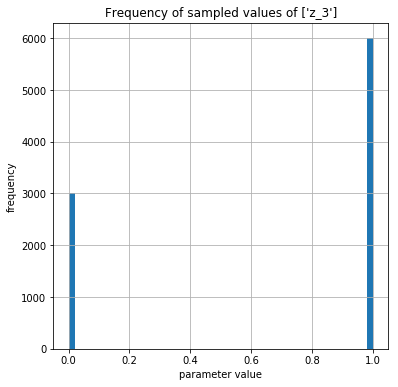

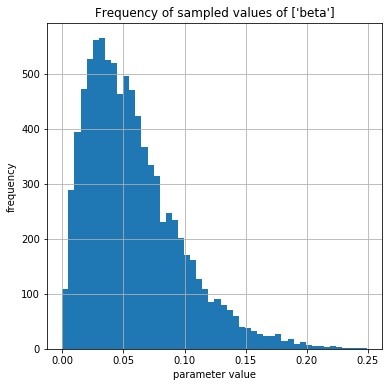

In [13]:
#samplebuddy.vizhist(*[f"z_{i}" for i in range(8)])
samplebuddy.vizhist('z_3')
samplebuddy.vizhist('beta')

## 6.5 - Assessment of Malingering

In [14]:
spec = """
model:
Malingering_1.txt


settings:
chains = 33
samples = 1000
thinning = 0
burnin = 1000

data:
k = [45, 45, 44, 45, 44, 45, 45, 45, 45 ,45, 30, 20, 6, 44, 44, 27, 25, 17, 14, 27, 35, 30]
p = len(k)
n = 45 #number of questions


sample:
psi
z

"""

modelbuddy = model_handler(spec)

model = pyjags.Model(**modelbuddy.get_model_args())
samples = model.sample(**modelbuddy.get_sample_args())

samplebuddy = sample_handler(samples)

adapting: iterations 33000 of 33000, elapsed 0:00:01, remaining 0:00:00
sampling: iterations 33000 of 33000, elapsed 0:00:01, remaining 0:00:00


In [15]:
samplebuddy.summarize()

,mean,std dev,median,mode,HPD,95CI
psi_0,0.990772,0.004143,0.991370,0.992395,"[0.981, 0.998]","[0.981, 0.997]"
psi_1,0.513409,0.023481,0.513609,0.516616,"[0.461, 0.562]","[0.467, 0.559]"
z_0,0.000000,0.000000,0.000000,0.005000,"[0.0, 0.001]","[0.0, 0.0]"
z_1,0.000000,0.000000,0.000000,0.005000,"[0.0, 0.001]","[0.0, 0.0]"
z_2,0.000000,0.000000,0.000000,0.005000,"[0.0, 0.001]","[0.0, 0.0]"
z_3,0.000000,0.000000,0.000000,0.005000,"[0.0, 0.001]","[0.0, 0.0]"
z_4,0.000000,0.000000,0.000000,0.005000,"[0.0, 0.001]","[0.0, 0.0]"
z_5,0.000000,0.000000,0.000000,0.005000,"[0.0, 0.001]","[0.0, 0.0]"
z_6,0.000000,0.000000,0.000000,0.005000,"[0.0, 0.001]","[0.0, 0.0]"
z_7,0.000000,0.000000,0.000000,0.005000,"[0.0, 0.001]","[0.0, 0.0]"


## 6.6 - Indivdual Differences in Malingering

In [16]:
spec = """
model:
Malingering_2.txt


settings:
chains = 3
samples = 1000
thinning = 0
burnin = 1000

data:
k = [45, 45, 44, 45, 44, 45, 45, 45, 45 ,45, 30, 20, 6, 44, 44, 27, 25, 17, 14, 27, 35, 30]
p = len(k)
n = 45 #number of questions


sample:
theta
z
mubon
lambdabon
mumal
lambdamal
mudiff
phi


"""

modelbuddy = model_handler(spec)

model = pyjags.Model(**modelbuddy.get_model_args())
samples = model.sample(**modelbuddy.get_sample_args())

samplebuddy = sample_handler(samples)

adapting: iterations 3000 of 3000, elapsed 0:00:01, remaining 0:00:00
sampling: iterations 3000 of 3000, elapsed 0:00:01, remaining 0:00:00


In [17]:
samplebuddy.summarize()

,mean,std dev,median,mode,HPD,95CI
lambdabon,403.111977,224.714928,393.384082,66.759454,"[40.182, 799.546]","[58.035, 776.93]"
lambdamal,10.120379,4.494791,9.262465,6.606836,"[4.005, 25.114]","[4.371, 21.406]"
mubon,0.985130,0.005753,0.985956,0.987475,"[0.963, 0.996]","[0.972, 0.994]"
mudiff,4.101172,0.464503,4.101833,3.970475,"[2.81, 5.168]","[3.23, 5.047]"
mumal,0.540402,0.059431,0.537773,0.535889,"[0.383, 0.699]","[0.426, 0.658]"
phi,0.469274,0.086561,0.468354,0.439639,"[0.238, 0.682]","[0.3, 0.64]"
theta_0_0,0.987454,0.007827,0.989029,0.992278,"[0.953, 1.0]","[0.968, 0.999]"
theta_0_1,0.548309,0.172720,0.547900,0.497138,"[0.027, 0.99]","[0.221, 0.892]"
theta_1_0,0.987393,0.007635,0.988636,0.992274,"[0.955, 1.0]","[0.968, 0.998]"
theta_1_1,0.541930,0.172054,0.542173,0.542578,"[0.046, 0.992]","[0.207, 0.872]"


In [18]:
samplebuddy.diagnostic()

all PSRF values < 1.05 | maximum PSRF: theta_15_0 at 1.0102489011617186.


## 6.7 - Alzheimer's Recall Test Cheating

Note: in both `pyjags` and `MATLAB`, I *sometimes* get the error `Error in node mubon
Slicer stuck at value with infinite density`.

Todo: ask Michael about it. Seems like such an error should get likelier the longer your sim's been running, which would be such a headache.

In [ ]:
spec = """
model:
Cheating.txt


settings:
chains = 3
samples = 3000
thinning = 0
burnin = 1000

data:
#variables are assigned below using the setdata method


sample:
z
phi
mubon
muche
lambdabon
lambdache
pc


"""

with open('d.txt', 'r') as file:
    d = [[int(i) for i in line.rstrip().split(',')] for line in file]
    
with open('truez.txt', 'r') as file:
    truez = [int(i.rstrip()) for i in file.readlines()]
    
k = np.sum(d,1)
p = len(k)
n = 40



modelbuddy = model_handler(spec)

#modelbuddy.setdata('d',d)
modelbuddy.setdata('truth',truez)
modelbuddy.setdata('k',k)
modelbuddy.setdata('p',p)
modelbuddy.setdata('n',n)

model = pyjags.Model(**modelbuddy.get_model_args())
samples = model.sample(**modelbuddy.get_sample_args())

samplebuddy = sample_handler(samples)

adapting: iterations 3000 of 3000, elapsed 0:00:05, remaining 0:00:00
sampling: iterations 3393 of 9000, elapsed 0:00:05, remaining 0:00:09


In [ ]:
#plot information related to the model
import pandas as pd
import matplotlib.pyplot as plt

accdata = pd.DataFrame()
accdata['group'] = truez
accdata['score'] = k


#plot histogram of accuracy by category
fig, ax1 = plt.subplots()
ax1.set_ylabel('number of people')
ax1.set_xlabel('number of items recalled correctly')

accdata[accdata['group']==1].hist('score', ax=ax1, alpha=.5)
accdata[accdata['group']==0].hist('score', ax=ax1, alpha=.5)
ax1.set_title('score count by group')
plt.show()


In [ ]:
#get model percent correct
pc = samplebuddy.get('pc')/118

#calculate percent correct using cutoffs
cutoffs = pd.DataFrame({'data':k, 'true':truez})
for i in range(40):
    cutoffs[i] = cutoffs['data'] > i

#plot both
fig, ax1 = plt.subplots()
ax2 = ax1.twiny()

ax1.set_ylabel('proportion correct')
ax1.set_xlabel('number of items recalled correctly')
ax1.set_title('classification accuracy by cutoff')

plt.sca(ax1)
plt.plot([sum(cutoffs[i]==cutoffs['true'])/118 for i in range(40)])

plt.sca(ax2)
plt.hist(pc, bins=25, orientation='horizontal');

In [ ]:
#Plot classification against correct recall count
summary = samplebuddy.summarize()
cheatclass = [summary.loc[f'z_{i}']['mean'] for i in range(118)]


fig, ax1 = plt.subplots()
ax1.set_ylabel('Cheater Classification')
ax1.set_xlabel('Number of Items Recalled Correctly')
plt.scatter(k,cheatclass, marker='x');

In [ ]:
samplebuddy.diagnostic()

We see poor mixing in these samples. I believe that we would normally resolve this by taking more samples. However, this code has a fairly high chance of sampling its way into regions it cannot sample its way back out of, making it rare that we can successfully take very high numbers of samples.